In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,confusion_matrix , accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
my_data = pd.read_csv("C:/Users/hp/Desktop/Machine Learning Intership Tasks/Task1/emails.csv")

In [3]:
my_data.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [4]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(my_data['text'])

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,my_data['spam'],test_size=0.2)

In [6]:
model = MultinomialNB()
model.fit(X_train, y_train)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


In [7]:
y_pred = model.predict(X_test)

# Evaluating
accuracy = accuracy_score(y_test,y_pred)
print(accuracy)

0.9912739965095986


In [8]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99       873
           1       0.97      0.99      0.98       273

    accuracy                           0.99      1146
   macro avg       0.98      0.99      0.99      1146
weighted avg       0.99      0.99      0.99      1146



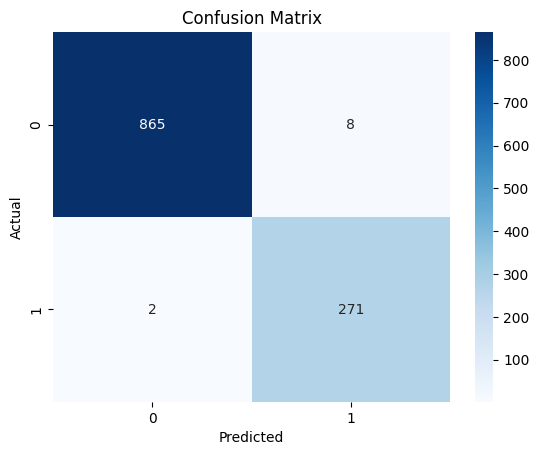

In [9]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [18]:
def predictMessage(message):
    messageVector = vectorizer.transform([message])
    prediction = model.predict(messageVector)
    return 'Spam' if prediction[0] == 1 else 'Ham'

UserMessage = input('Enter Text To Predict: ')
prediction = predictMessage(UserMessage)
print('Text: ',UserMessage)
print(f'The message is: {prediction}')

Text:  Hey! you have won an iphone. Click here to claim
The message is: Spam
